In [ ]:
#!pip3 install scipy

In [ ]:
#!pip3 install --upgrade pip

In [ ]:
#!pip3 install PyWavelets

In [ ]:
#!pip install scikit-image

In [17]:
import numpy as np
import scipy.signal as signal
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import pywt
from skimage import io, color

In [56]:
def losw_basis(t):
    beta3 = lambda x: (1/6) * ((abs(x) < 1) * (4 - 6*x**2 + 3*abs(x)**3) +
                              ((1 <= abs(x)) & (abs(x) < 2)) * (2 - abs(x))**3)
    return (9/5 * beta3(t) - 19/30 * beta3(t + 1) + 4/15 * beta3(t + 3/2) - (1/30) * beta3(t + 2) -
            19/30 * beta3(t - 1) + (4/15) * beta3(t - 3/2) - (1/30) * beta3(t - 2))

def losw_filter_bank():
    p = np.array([9/5, -19/15, 8/15, -1/15])
    q = np.array([0.5, -0.5]) 
    return p, q

def losw_decompose(image):
    image = color.rgb2gray(image) if len(image.shape) == 3 else image
    p, q = losw_filter_bank()
    
    # Фильтрация строк
    low_rows = signal.convolve2d(image, p.reshape(1, -1), mode='same', boundary='symm')
    high_rows = signal.convolve2d(image, q.reshape(1, -1), mode='same', boundary='symm')
    
    # Фильтрация столбцов
    cA = signal.convolve2d(low_rows, p.reshape(-1, 1), mode='same', boundary='symm')
    cH = signal.convolve2d(low_rows, q.reshape(-1, 1), mode='same', boundary='symm')
    cV = signal.convolve2d(high_rows, p.reshape(-1, 1), mode='same', boundary='symm')
    cD = signal.convolve2d(high_rows, q.reshape(-1, 1), mode='same', boundary='symm')
    
    return cA, cH, cV, cD

def plot_decomposition(image, cA, cH, cV, cD):
    fig, axes = plt.subplots(3, 2, figsize=(10, 9))
    
    axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('Original Image')
    axes[0, 0].axis('off')  # Убираем оси для оригинального изображения
    
    axes[0, 1].axis('off')
    
    axes[1, 0].imshow(cA, cmap='gray')
    axes[1, 0].set_title('Low-frequency (cA)')
    axes[1, 1].imshow(cH, cmap='gray')
    axes[1, 1].set_title('High-frequency horizontal (cH)')
    
    axes[2, 0].imshow(cV, cmap='gray')
    axes[2, 0].set_title('High-frequency vertical (cV)')
    axes[2, 1].imshow(cD, cmap='gray')
    axes[2, 1].set_title('High-frequency diagonal (cD)')
    
    for ax in axes.flat:
        ax.axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)  

Example

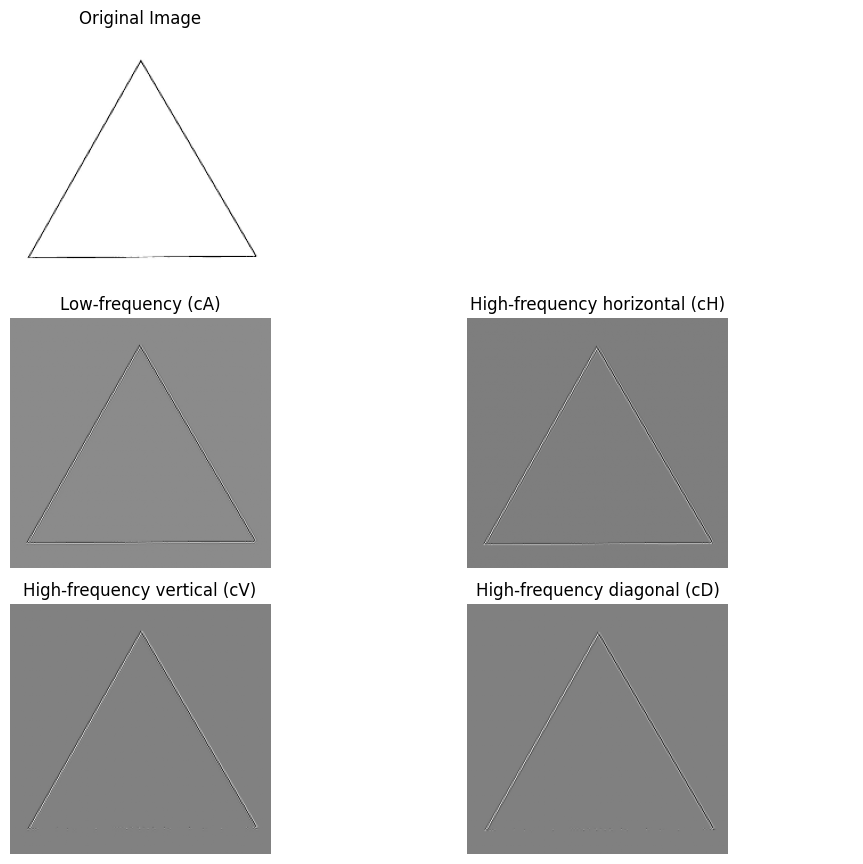

In [57]:
image = io.imread('example_triangle.png', as_gray=True)

cA, cH, cV, cD = losw_decompose(image)

plot_decomposition(image, cA, cH, cV, cD)